In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import csv
import pandas as pd

GRACE data source: https://drive.google.com/drive/folders/1Csxpisoz0S0PTg6ndIBzoApIVtqlCDBO
* shared from Max Bleiweiss
* from nasagrace.unl.edu

**Open GRACE data:**

In [2]:
grace_ds = xr.open_dataset("GRACEDADM_CLSM0125US_7D.A20020401.030.nc4")
grace_date = pd.to_datetime(grace_ds.time.values[0])

GRACE data has various drought variables:
* groundwater storage percentile
* root zone soil moisture percentile
* surface soil moisture percentile

In [3]:
grace_ds

<xarray.Dataset>
Dimensions:     (lat: 224, lon: 464, time: 1)
Coordinates:
  * lat         (lat) float32 25.06 25.19 25.31 25.44 ... 52.69 52.81 52.94
  * lon         (lon) float32 -124.9 -124.8 -124.7 ... -67.31 -67.19 -67.06
  * time        (time) datetime64[ns] 2002-04-01
Data variables:
    gws_inst    (time, lat, lon) float32 ...
    rtzsm_inst  (time, lat, lon) float32 ...
    sfsm_inst   (time, lat, lon) float32 ...
Attributes: (12/15)
    missing_value:          -999.0
    title:                  GRACE Data Assimilation Drought Indicator
    version:                030
    input:                  CSR_GRACE_GRACE-FO_RL06_Mascons_all-corrections_20
    institution:            NASA GSFC HSL
    source:                 Catchment
    ...                     ...
    comment:                website: http://drought.unl.edu/MonitoringTools/N...
    MAP_PROJECTION:         EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:  25.0625
    SOUTH_WEST_CORNER_LON:  -124.9375
    DX:                     0.125
    DY:                     0.125

In [4]:
latitude_north = 43
latitude_south = 26
longitude_west = -124
longitude_east = -97

/var/folders/pd/x01_y6d52zj47w6_m5_h_8f80000gr/T/ipykernel_8583/490101976.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


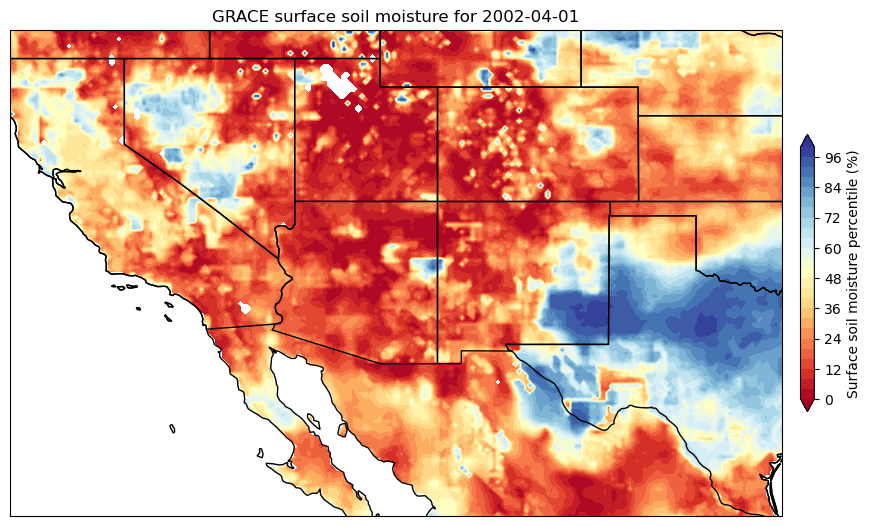

In [5]:
projection=ccrs.PlateCarree(central_longitude=0)
fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})
cmap = plt.cm.RdYlBu
levels = np.linspace(0, 100, 26)

c=ax.contourf(grace_ds.lon, grace_ds.lat, grace_ds.sfsm_inst[0], cmap=cmap, extend='both', levels=levels)

ax.set_extent([longitude_west, longitude_east, latitude_south, latitude_north], crs=ccrs.PlateCarree())

clb = plt.colorbar(c, shrink=0.3, pad=0.02, ax=ax)
clb.set_label('Surface soil moisture percentile (%)')

ax.set_title("GRACE surface soil moisture for "+grace_date.strftime('%Y-%m-%d') )
ax.coastlines(resolution='50m', color='black', linewidth=1)
ax.add_feature(cfeature.STATES)

fig.show()

**Load in the dust climatology data from the study:**

In [6]:
with open('Dust_LatLon_SecondPass_Bill.xlsx - Data LatLon.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    #for row in reader:
        #print(', '.join(row))

Build the dust climatology dataframe:

In [7]:
dust_df = pd.read_csv('Dust_LatLon_SecondPass_Bill.xlsx - Data LatLon.csv')

#--- Converting the string datetime to actual datetime
dust_df['Date (YYYYMMDD)'] = pd.to_datetime(dust_df['Date (YYYYMMDD)'], format='%Y%m%d')

#--- Removing the dates not checked by me or Bill
dust_df = dust_df[(dust_df['Jesse Check'] == 'x') | (dust_df['Bill add'] == 'x')]

dust_df

,Date (YYYYMMDD),YYYY,M,D,latitude,longitude,start time (UTC),Jesse Check,Bill add,Notes,...,GOES Raw,GOES Images,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
24,2001-01-13,2001.0,1.0,13.0,33.89,-102.94,1800.0,NaN,x,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,2001-01-16,2001.0,1.0,16.0,30.31,-107.47,1900.0,x,NaN,NaN,...,NaN,NaN,NaN,NaN,20010504.0,NaN,NaN,NaN,NaN,NaN
26,2001-01-16,2001.0,1.0,16.0,29.41,-106.88,1900.0,x,NaN,NaN,...,NaN,NaN,NaN,NaN,20010505.0,NaN,NaN,NaN,NaN,NaN
27,2001-01-16,2001.0,1.0,16.0,29.21,-106.12,1900.0,x,NaN,NaN,...,NaN,NaN,NaN,NaN,20010505.0,NaN,NaN,NaN,NaN,NaN
28,2001-01-16,2001.0,1.0,16.0,28.60,-106.51,1930.0,x,NaN,NaN,...,NaN,NaN,NaN,NaN,20010516.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3481,2020-12-23,2020.0,12.0,23.0,38.00,-101.7,1530.0,x,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3482,2020-12-29,2020.0,12.0,29.0,29.30,-106.8,1930.0,x,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3483,2020-12-29,2020.0,12.0,29.0,28.90,-106.9,1930.0,x,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3484,2020-12-29,2020.0,12.0,29.0,29.00,-104.8,2000.0,x,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Select dust events around the date from the GRACE data:**
* determine the time range of dust events considered

In [8]:
start_date = grace_date #- pd.Timedelta(days=7)
end_date = grace_date + pd.Timedelta(days=7)

dust_df_date = dust_df[(dust_df['Date (YYYYMMDD)'] >= start_date) & (dust_df['Date (YYYYMMDD)'] <= end_date)]

dust_df_date

,Date (YYYYMMDD),YYYY,M,D,latitude,longitude,start time (UTC),Jesse Check,Bill add,Notes,...,GOES Raw,GOES Images,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
352,2002-04-02,2002.0,4.0,2.0,31.23,-103.62,1630.0,x,NaN,NaN,...,x,x,NaN,NaN,20030623.0,NaN,NaN,NaN,NaN,NaN
353,2002-04-02,2002.0,4.0,2.0,31.02,-104.75,1630.0,x,NaN,NaN,...,x,x,NaN,NaN,20030623.0,NaN,NaN,NaN,NaN,NaN
354,2002-04-02,2002.0,4.0,2.0,33.00,-102.44,1630.0,x,NaN,NaN,...,x,x,NaN,NaN,20030623.0,NaN,NaN,NaN,NaN,NaN
355,2002-04-06,2002.0,4.0,6.0,32.95,-115.77,1830.0,x,NaN,NaN,...,x,x,NaN,NaN,20030624.0,NaN,NaN,NaN,NaN,NaN
356,2002-04-07,2002.0,4.0,7.0,31.52,-107.22,1630.0,x,NaN,NaN,...,x,x,NaN,NaN,20030711.0,NaN,NaN,NaN,NaN,NaN
357,2002-04-07,2002.0,4.0,7.0,30.99,-106.97,1700.0,NaN,x,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358,2002-04-07,2002.0,4.0,7.0,31.20,-104.7,1930.0,NaN,x,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
359,2002-04-07,2002.0,4.0,7.0,29.33,-105.99,1930.0,NaN,x,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
360,2002-04-07,2002.0,4.0,7.0,27.46,-104.82,1930.0,NaN,x,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,2002-04-07,2002.0,4.0,7.0,26.57,-104.02,1900.0,NaN,x,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Plot the GRACE soil moisture with the tracked dust events:

/var/folders/pd/x01_y6d52zj47w6_m5_h_8f80000gr/T/ipykernel_8583/2725840751.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


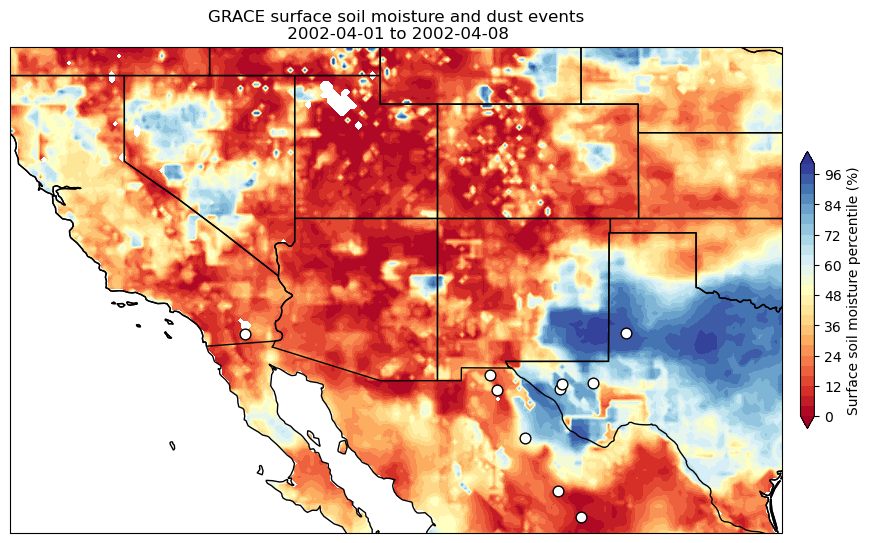

In [10]:
projection=ccrs.PlateCarree(central_longitude=0)
fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})
cmap = plt.cm.RdYlBu
levels = np.linspace(0, 100, 26)

c=ax.contourf(grace_ds.lon, grace_ds.lat, grace_ds.sfsm_inst[0], cmap=cmap, extend='both', levels=levels)
dust=ax.scatter(dust_df_date.longitude.astype(float), dust_df_date.latitude.astype(float), s=60, facecolors='white', edgecolors='black')

ax.set_extent([longitude_west, longitude_east, latitude_south, latitude_north], crs=ccrs.PlateCarree())

clb = plt.colorbar(c, shrink=0.3, pad=0.02, ax=ax)
clb.set_label('Surface soil moisture percentile (%)')

ax.set_title("GRACE surface soil moisture and dust events\n "+start_date.strftime('%Y-%m-%d')+" to "+end_date.strftime('%Y-%m-%d') )
ax.coastlines(resolution='50m', color='black', linewidth=1)
ax.add_feature(cfeature.STATES)

#fig.savefig("/Users/jesseturner/Downloads/grace_dust_"+start_date.strftime('%Y_%m_%d'), dpi=200, bbox_inches='tight')
fig.show()